# IBM Capstone Project - Battle of Neighborhoods

### 1. Problem definition and background

A European restaurant chain owner wants to open a new restaurant overseas notably in Chicago in the USA.
The investor operates the increasingly popular fine cuisine restaurants, specializing in a special vegan menu offers.

He chose this big city based on the basis of preliminary market research of the Midwest region, but he wants to learn more about the conditions within the city so that he can choose a suitable place to open his restaurant.

The investor prefers those areas that are frequently visited by tourists and local residents, and they're gastronomically popular, but there aren't many fine cuisine restaurants.

### 2. Importing required libraries

In [88]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# 0.5.0
!pip install folium==0.5.0 
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### 3. Import tables from a webpage

In [89]:
web = 'https://en.wikipedia.org/wiki/Community_areas_in_Chicago'
chicago_raw = pd.read_html(web) # read the HTML file into dataframe

# checking the number of tables in the dataframe
print('Number of tables on webpage:', len(chicago_raw))

chicago_raw # I'll print the contents of dataframe to see the position of the table I need

Number of tables on webpage: 4


[   Number[8]          Name[8]  2017[9] Area (sq mi.)[10]  Area (km2)  \
 0         01      Rogers Park    55062              1.84        4.77   
 1         02       West Ridge    76215              3.53        9.14   
 2         03           Uptown    57973              2.32        6.01   
 3         04   Lincoln Square    41715              2.56        6.63   
 4         05     North Center    35789              2.05        5.31   
 ..       ...              ...      ...               ...         ...   
 73        74  Mount Greenwood    19277              2.71        7.02   
 74        75      Morgan Park    22394              3.30        8.55   
 75        76           O'Hare    12377             13.34       34.55   
 76        77        Edgewater    55965              1.74        4.51   
 77     Total          Chicago  2722586        227.34[12]      588.81   
 
     2017density (/sq mi.)  2017density (/km2)  
 0                29925.00            11554.11  
 1                21590.

### 4. Loading relevant table data into dataframe

In [90]:
# I need the first table ---> index=0
# create dataframe with a column ('Name') of name of community areas
chicago_districts = pd.DataFrame(data=chicago_raw[0]['Name[8]'])
chicago_districts.head(40)

,Name[8]
0,Rogers Park
1,West Ridge
2,Uptown
3,Lincoln Square
4,North Center
5,Lake View
6,Lincoln Park
7,Near North Side
8,Edison Park
9,Norwood Park


### 5. First round exploration and cleaning of data

#### 5.1. Rename column name and remove rows that we don't need furthermore

In [91]:
chicago_districts.rename(columns={'Name[8]':'Name'}, inplace=True)
chicago_districts = chicago_districts.drop([77])
chicago_districts.head(40)

,Name
0,Rogers Park
1,West Ridge
2,Uptown
3,Lincoln Square
4,North Center
5,Lake View
6,Lincoln Park
7,Near North Side
8,Edison Park
9,Norwood Park


#### 5.2. Inspection and improvement of district names if necessary

In [92]:
# we should replace value in row 31 because it can cause error during geocoding
chicago_districts.xs(31)['Name']='Loop'

In [93]:
chicago_districts

,Name
0,Rogers Park
1,West Ridge
2,Uptown
3,Lincoln Square
4,North Center
...,...
72,Washington Heights
73,Mount Greenwood
74,Morgan Park
75,O'Hare


### 6. Extracting location data of districts by geocoding

In [136]:
latitude = []
longitude = []
locator = Nominatim(user_agent="MyGeocoder", timeout=10000)
for n in range(0, len(chicago_districts['Name'])):
    location = locator.geocode(chicago_districts.iloc[n,0]+", Chicago, IL")
    if location is not None:
        print(n, ":", chicago_districts.iloc[n,0])
        latitude.append(location.latitude)
        longitude.append(location.longitude)
print("Geocoding is ready!")

0 : Rogers Park
1 : West Ridge
2 : Uptown
3 : Lincoln Square
4 : North Center
5 : Lake View
6 : Lincoln Park
7 : Near North Side
8 : Edison Park
9 : Norwood Park
10 : Jefferson Park
11 : Forest Glen
12 : North Park
13 : Albany Park
14 : Portage Park
15 : Irving Park
16 : Dunning
17 : Montclare
18 : Belmont Cragin
19 : Hermosa
20 : Avondale
21 : Logan Square
22 : Humboldt Park
23 : West Town
24 : Austin
25 : West Garfield Park
26 : East Garfield Park
27 : Near West Side
28 : North Lawndale
29 : South Lawndale
31 : Loop
32 : Near South Side
33 : Armour Square
34 : Douglas
35 : Oakland
36 : Fuller Park
37 : Grand Boulevard
38 : Kenwood
39 : Washington Park
40 : Hyde Park
41 : Woodlawn
42 : South Shore
43 : Chatham
44 : Avalon Park
45 : South Chicago
46 : Burnside
47 : Calumet Heights
48 : Roseland
49 : Pullman
50 : South Deering
51 : East Side
52 : West Pullman
53 : Riverdale
54 : Hegewisch
55 : Garfield Ridge
56 : Archer Heights
57 : Brighton Park
58 : McKinley Park
59 : Bridgeport
60 : 

### 7. Second round of data exploration and cleaning

#### 7.1. Adding a missing data series

##### It can be seen that record #30 is missing, so we have to collect its coordinates from somewhere!

In [7]:
# getting geocoordinates of Lower West Side by using postal code
address = '60608, chicago, Cook, IL'


geolocator = Nominatim(user_agent="foursquare_agent", timeout=10000)
location_LWS = geolocator.geocode(address)
latitude_LWS = location_LWS.latitude
longitude_LWS = location_LWS.longitude
print(latitude_LWS, longitude_LWS)

41.8964706 -87.6357194


##### Lets insert geocoordiantes of 'Lower West Side' into the dataframe!

In [139]:
latitude.insert(30, latitude_LWS)
longitude.insert(30, longitude_LWS)

#### 7.2. Adding geo coordinates to dataframe

In [141]:
chicago_districts_loc = chicago_districts.assign(Latitude=latitude, Longitude=longitude)

In [142]:
chicago_districts_loc.head(40)

,Name,Latitude,Longitude
0,Rogers Park,42.009574,-87.675550
1,West Ridge,41.879788,-87.633113
2,Uptown,41.969450,-87.660513
3,Lincoln Square,40.148032,-89.363308
4,North Center,41.858657,-87.612199
5,Lake View,41.885382,-87.627908
6,Lincoln Park,41.939945,-87.636120
7,Near North Side,41.896471,-87.635719
8,Edison Park,42.002484,-87.818219
9,Norwood Park,41.991470,-87.798759


#### 7.3. Correction of incorrect coordinates

##### We can see that geocoordinates of "Albany Park" might not be correct. So let check and replace them to the correct ones!

In [143]:
# getting geocoordinates of Albany Park by using Postal code
address = '60625, chicago, Cook, IL'


geolocator = Nominatim(user_agent="foursquare_agent", timeout=10000)
location_AP = geolocator.geocode(address)
latitude_AP = location_AP.latitude
longitude_AP = location_AP.longitude
print(latitude_AP, longitude_AP)

41.976282749999996 -87.74007993121211


In [144]:
chicago_districts_loc['Latitude'].loc[13] = latitude_AP
chicago_districts_loc['Longitude'].loc[13] = longitude_AP

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [145]:
chicago_districts_loc.head(40)

,Name,Latitude,Longitude
0,Rogers Park,42.009574,-87.675550
1,West Ridge,41.879788,-87.633113
2,Uptown,41.969450,-87.660513
3,Lincoln Square,40.148032,-89.363308
4,North Center,41.858657,-87.612199
5,Lake View,41.885382,-87.627908
6,Lincoln Park,41.939945,-87.636120
7,Near North Side,41.896471,-87.635719
8,Edison Park,42.002484,-87.818219
9,Norwood Park,41.991470,-87.798759


#### 7.4. Checking for duplicate coordinates

##### Duplicates occur between the coordinates, let filter them out!

In [146]:
duplicated_latitude = chicago_districts_loc['Latitude'].duplicated()
duplicated_longitude = chicago_districts_loc['Longitude'].duplicated()

In [147]:
count = 0
for lat, long in zip(duplicated_latitude, duplicated_longitude):
    if (lat==True and long==True):
        print(count, ": " + chicago_districts_loc.iloc[count, 0], ": " + str(chicago_districts_loc.iloc[count, 1]), ": " + str(chicago_districts_loc.iloc[count, 2]))
    count += 1

12 : North Park : 41.8586566 : -87.6121985
26 : East Garfield Park : 41.8820876 : -87.71591710895399
27 : Near West Side : 41.8964706 : -87.6357194
29 : South Lawndale : 41.8539606 : -87.7179739
30 : Lower West Side : 41.8964706 : -87.6357194
32 : Near South Side : 41.8964706 : -87.6357194
66 : West Englewood : 41.7784513 : -87.6437453059056


##### The easiest way to solve the duplicate problem is to combine the affected districts

In [148]:
chicago_districts_loc.iloc[4, 0] = 'North Center, North Park'
chicago_districts_loc.iloc[25, 0] = 'West Garfield Park, East Garfiled Park'
chicago_districts_loc.iloc[27, 0] = 'Near West Side, Near South Side, Lower West Side'
chicago_districts_loc.iloc[23, 0] = 'West Town, West Englewood'
chicago_districts_loc = chicago_districts_loc.drop([12, 26, 30, 32, 66])

In [149]:
chicago_districts_loc = chicago_districts_loc.reset_index(drop=True)

In [150]:
chicago_districts_loc.loc[0:50, :]

,Name,Latitude,Longitude
0,Rogers Park,42.009574,-87.675550
1,West Ridge,41.879788,-87.633113
2,Uptown,41.969450,-87.660513
3,Lincoln Square,40.148032,-89.363308
4,"North Center, North Park",41.858657,-87.612199
5,Lake View,41.885382,-87.627908
6,Lincoln Park,41.939945,-87.636120
7,Near North Side,41.896471,-87.635719
8,Edison Park,42.002484,-87.818219
9,Norwood Park,41.991470,-87.798759


### 8. Saving data

#### 8.1. To make it easier to work later, you may want to save the data in some text file format

In [151]:
chicago_districts_loc.to_csv('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\\COURSERA\\IBM_Data_Science\\Course_9\\chicago_data.csv', index=False)

#### 8.2. Reload data into a new dataframe

In [94]:
chicago_districts_locations = pd.read_csv('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\\COURSERA\\IBM_Data_Science\\Course_9\\chicago_data.csv')
chicago_districts_locations

,Name,Latitude,Longitude
0,Rogers Park,42.009574,-87.675550
1,West Ridge,41.879788,-87.633113
2,Uptown,41.969450,-87.660513
3,Lincoln Square,40.148032,-89.363308
4,"North Center, North Park",41.858657,-87.612199
...,...,...,...
67,Washington Heights,41.705596,-87.655931
68,Mount Greenwood,41.691818,-87.699001
69,Morgan Park,41.885592,-87.651928
70,O'Hare,41.977921,-87.903141


### 9. Displaying coordinates of districts on map

#### 9.1. Extracting geo coordinates of Chicago

In [95]:
address = 'Chicago, Illinois'

geolocator = Nominatim(user_agent="chicago_explorer", timeout=10000)
location_city = geolocator.geocode(address)
latitude_city = location_city.latitude
longitude_city = location_city.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude_city, longitude_city))

The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


#### 9.2. Creating a map with folium to displaying location of individual districts

In [96]:
# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude_city, longitude_city], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(chicago_districts_locations['Latitude'], chicago_districts_locations['Longitude'], chicago_districts_locations['Name']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

### 10. Define Foursquare Credentials and Version

In [35]:
CLIENT_ID = 'HYVGUV2YWU05NYMGLJNGLSTRECPK2RJCK1WV0BQ0NHMOOZDS' # your Foursquare ID
CLIENT_SECRET = 'XPH1Z5O2YIFPVE0AEILTXMIUUIAFFDH3VRCG2YCZ2DLTC543' # your Foursquare Secret
ACCESS_TOKEN = 'NWPBJFP5BQIOYKCM2EIFQ1IIVWON5P0SCQJKD1DCBFUDHY04' # your FourSquare Access Token
VERSION = '20210129'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HYVGUV2YWU05NYMGLJNGLSTRECPK2RJCK1WV0BQ0NHMOOZDS
CLIENT_SECRET:XPH1Z5O2YIFPVE0AEILTXMIUUIAFFDH3VRCG2YCZ2DLTC543


### 11. Let's explore the first district in our dataframe.

#### 11.1. Get the district's name.

In [97]:
chicago_districts_locations.loc[0, 'Name']

'Rogers Park'

#### 11.2. Get the district's latitude and longitude values.

In [98]:
district_latitude = chicago_districts_locations.loc[0, 'Latitude'] # neighborhood latitude value
district_longitude = chicago_districts_locations.loc[0, 'Longitude'] # neighborhood longitude value

district_name = chicago_districts_locations.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(district_name, 
                                                               district_latitude, 
                                                               district_longitude))

Latitude and longitude values of Rogers Park are 42.009574, -87.6755503.


#### 11.3. Let's get the top 100 venues that are in Rogers Park within a radius of 750 meters

In [99]:
# Create a GET request
LIMIT = 100
radius = 750
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    district_latitude, 
    district_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=HYVGUV2YWU05NYMGLJNGLSTRECPK2RJCK1WV0BQ0NHMOOZDS&client_secret=XPH1Z5O2YIFPVE0AEILTXMIUUIAFFDH3VRCG2YCZ2DLTC543&v=20210129&ll=42.009574,-87.6755503&radius=750&limit=100'

#### 11.4. Send the GET request and examine the results

In [100]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6032d8ceedceca4e3dbd60cc'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Rogers Park',
  'headerFullLocation': 'Rogers Park, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 43,
  'suggestedBounds': {'ne': {'lat': 42.016324006750004,
    'lng': -87.66648286467588},
   'sw': {'lat': 42.00282399325, 'lng': -87.68461773532411}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b6ed827f964a5200bcd2ce3',
       'name': 'El Famous Burrito',
       'location': {'address': '7047 N Clark St',
        'crossStreet': 'Greenleaf',
        'lat': 42.01042128720865,
        'lng': -87.674204

#### 11.5. Define a get_category_type function

In [101]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### 11.6. Filter relevant values from the json file

In [102]:
venues = results['response']['groups'][0]['items']
# print(venues)   
nearby_venues = json_normalize(venues) # flatten JSON
# print(nearby_venues)
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# print(nearby_venues)
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-102-8fcca48cd8f6>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,El Famous Burrito,Mexican Restaurant,42.010421,-87.674204
1,Taqueria & Restaurant Cd. Hidalgo,Mexican Restaurant,42.011634,-87.674484
2,Bark Place,Pet Store,42.010080,-87.675223
3,Panaderia Ayutla,Bakery,42.008405,-87.673536
4,Mind Crusher Tattoo,Tattoo Parlor,42.003801,-87.672525


#### 11.7. We can print out how many venues are returned by Foursquare.

In [103]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

43 venues were returned by Foursquare.


### 12. Explore districts in Chicago

In [104]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District Name', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### 12.1. Now write the code to run the above function on each districts and create a new dataframe called chicago_venues.

In [54]:
chicago_venues = getNearbyVenues(names=chicago_districts_locations['Name'],
                                   latitudes=chicago_districts_locations['Latitude'],
                                   longitudes=chicago_districts_locations['Longitude'])

Rogers Park
West Ridge
Uptown
Lincoln Square
North Center, North Park
Lake View
Lincoln Park
Near North Side
Edison Park
Norwood Park
Jefferson Park
Forest Glen
Albany Park
Portage Park
Irving Park
Dunning
Montclare
Belmont Cragin
Hermosa
Avondale
Logan Square
Humboldt Park
West Town, West Englewood
Austin
West Garfield Park, East Garfiled Park
Near West Side, Near South Side, Lower West Side
North Lawndale
South Lawndale
Loop
Armour Square
Douglas
Oakland
Fuller Park
Grand Boulevard
Kenwood
Washington Park
Hyde Park
Woodlawn
South Shore
Chatham
Avalon Park
South Chicago
Burnside
Calumet Heights
Roseland
Pullman
South Deering
East Side
West Pullman
Riverdale
Hegewisch
Garfield Ridge
Archer Heights
Brighton Park
McKinley Park
Bridgeport
New City
West Elsdon
Gage Park
Clearing
West Lawn
Chicago Lawn
Englewood
Greater Grand Crossing
Ashburn
Auburn Gresham
Beverly Hills
Washington Heights
Mount Greenwood
Morgan Park
O'Hare
Edgewater


#### 12.2. Let's check the size of the resulting dataframe

In [55]:
# chicago_venues = pd.read_excel('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\COURSERA\\IBM_Data_Science\\Course_9\\chicago_venues_500.xlsx')
print(chicago_venues.shape)
chicago_venues.head()

(4919, 7)


,District Name,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rogers Park,42.009574,-87.67555,El Famous Burrito,42.010421,-87.674204,Mexican Restaurant
1,Rogers Park,42.009574,-87.67555,Taqueria & Restaurant Cd. Hidalgo,42.011634,-87.674484,Mexican Restaurant
2,Rogers Park,42.009574,-87.67555,Bark Place,42.010080,-87.675223,Pet Store
3,Rogers Park,42.009574,-87.67555,Morse Fresh Market,42.008087,-87.667041,Grocery Store
4,Rogers Park,42.009574,-87.67555,Mind Crusher Tattoo,42.003801,-87.672525,Tattoo Parlor


In [56]:
# chicago_venues.to_excel('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\COURSERA\\IBM_Data_Science\\Course_9\\chicago_venues.xlsx')

#### 12.3. Calculating how many venues are in each district

In [57]:
chicago_venues.groupby('District Name').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District Name,,,,,,
Albany Park,67,67,67,67,67,67
Archer Heights,76,76,76,76,76,76
Armour Square,94,94,94,94,94,94
Ashburn,74,74,74,74,74,74
Auburn Gresham,48,48,48,48,48,48
...,...,...,...,...,...,...
West Lawn,100,100,100,100,100,100
West Pullman,29,29,29,29,29,29
West Ridge,100,100,100,100,100,100


#### 12.4. Let's print out how many unique categories ov venues exist in the data frame

In [58]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 342 uniques categories.


### 13. Analyze each neighbourhood

In [59]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['District Name'] = chicago_venues['District Name'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

,District Name,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,...,Warehouse Store,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# chicago_onehot.to_excel('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\COURSERA\\IBM_Data_Science\\Course_9\\chicago_onehot.xlsx')

#### 13.1. Let's check size of the results of one hot encoding

In [61]:
chicago_onehot.shape

(4919, 343)

#### 13.2. Grouping rows by districts and by taking the mean of frequency of occurrence of each category

In [62]:
chicago_grouped = chicago_onehot.groupby('District Name').mean().reset_index()
chicago_grouped

,District Name,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,...,Warehouse Store,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Albany Park,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000
1,Archer Heights,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.013158,0.0,0.000000
2,Armour Square,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.00,0.010638,0.0,0.000000,0.0,0.010638
3,Ashburn,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.013514,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000
4,Auburn Gresham,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,West Lawn,0.000000,0.01,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.01,0.020000,0.0,0.000000,0.0,0.010000
68,West Pullman,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000
69,West Ridge,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.01,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.0,0.010000
70,"West Town, West Englewood",0.033333,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.033333,0.0,0.000000


In [63]:
# chicago_grouped.to_excel('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\COURSERA\\IBM_Data_Science\\Course_9\\chicago_grouped.xlsx')

#### 13.3. Let's check the grouped dataframe size

In [64]:
chicago_grouped.shape

(72, 343)

#### 13.4. Check the top 5 most common venue categories in each district

In [65]:
num_top_venues = 5

for hood in chicago_grouped['District Name']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['District Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park----
                       venue  freq
0                Pizza Place  0.09
1                       Park  0.07
2                 Hookah Bar  0.04
3  Middle Eastern Restaurant  0.04
4             Sandwich Place  0.04


----Archer Heights----
                venue  freq
0  Mexican Restaurant  0.12
1      Discount Store  0.05
2      Sandwich Place  0.05
3         Pizza Place  0.05
4                Bank  0.04


----Armour Square----
            venue  freq
0     Coffee Shop  0.07
1  Sandwich Place  0.06
2            Park  0.05
3       Bookstore  0.05
4            Café  0.04


----Ashburn----
                  venue  freq
0                  Park  0.09
1           Pizza Place  0.05
2        Sandwich Place  0.05
3  Fast Food Restaurant  0.04
4   Fried Chicken Joint  0.04


----Auburn Gresham----
                  venue  freq
0    Seafood Restaurant  0.08
1   Fried Chicken Joint  0.06
2        Discount Store  0.06
3                  Park  0.06
4  Fast Food Restaurant  0.06


----

#### 13.5. Put that into a pandas dataframe

In [66]:
# This is a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### 13.6. Create the new dataframe and display the top 10 venues for each District

In [67]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District Name'] = chicago_grouped['District Name']

for ind in np.arange(chicago_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Pizza Place,Park,Middle Eastern Restaurant,Hookah Bar,Sandwich Place,Ice Cream Shop,Supermarket,Mobile Phone Shop,Donut Shop,Coffee Shop
1,Archer Heights,Mexican Restaurant,Pizza Place,Discount Store,Sandwich Place,Bank,Fast Food Restaurant,Video Store,Bar,Grocery Store,Bakery
2,Armour Square,Coffee Shop,Sandwich Place,Bookstore,Park,Café,History Museum,Grocery Store,Sushi Restaurant,Thai Restaurant,Pet Store
3,Ashburn,Park,Sandwich Place,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Fried Chicken Joint,Seafood Restaurant,Pharmacy,BBQ Joint,Furniture / Home Store
4,Auburn Gresham,Seafood Restaurant,Discount Store,Fried Chicken Joint,Fast Food Restaurant,Park,Pharmacy,Grocery Store,Bus Station,Hot Dog Joint,Dive Bar


In [68]:
# district_venues_sorted.to_excel('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\COURSERA\\IBM_Data_Science\\Course_9\\district_venues_sorted.xlsx')

In [69]:
# chicago_grouped = pd.read_excel('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\COURSERA\\IBM_Data_Science\\Course_9\\chicago_grouped_500.xlsx')
chicago_grouped.head()

,District Name,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,...,Warehouse Store,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Albany Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,Archer Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.013158,0.0,0.000000
2,Armour Square,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.010638,0.0,0.000000,0.0,0.010638
3,Ashburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.013514,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,Auburn Gresham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


### 14. Filtering of venue categories

In [70]:
restaurant_list = []
transport_centre_list = []
hotel_list = []
filtered_list=['District Name']

for n in chicago_grouped.columns:
    if 'Restaurant' in n or 'Pizza' in n:
        restaurant_list.append(n)
    elif 'Bus Station' in n or 'Airport' in n or 'Train Station' in n:
        transport_centre_list.append(n)
    elif 'Hotel' in n:
        hotel_list.append(n)
        
restaurant_list.extend(transport_centre_list)
restaurant_list.extend(hotel_list)
filtered_list.extend(restaurant_list)

chicago_grouped_filtered = chicago_grouped[filtered_list]

chicago_grouped_filtered.head()

,District Name,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,...,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,Bus Station,Train Station,Hotel,Hotel Bar,Hotel Pool
0,Albany Park,0.0,0.0,0.014925,0.0,0.000000,0.0,0.0,0.000000,0.014925,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,Archer Heights,0.0,0.0,0.026316,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.013158,0.000000,0.013158,0.0,0.0
2,Armour Square,0.0,0.0,0.010638,0.0,0.010638,0.0,0.0,0.010638,0.010638,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,Ashburn,0.0,0.0,0.013514,0.0,0.000000,0.0,0.0,0.000000,0.013514,...,0.0,0.0,0.0,0.0,0.0,0.013514,0.013514,0.000000,0.0,0.0
4,Auburn Gresham,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.020833,0.020833,...,0.0,0.0,0.0,0.0,0.0,0.041667,0.000000,0.000000,0.0,0.0


In [71]:
# chicago_grouped_filtered.to_excel('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\COURSERA\\IBM_Data_Science\\Course_9\\chicago_grouped_filtered.xlsx')

### 15. Cluster Districts

In [84]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'ro-')
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xticks(np.arange(2, x), fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [86]:
max_range = 10

chicago_grouped_clustering = chicago_grouped_filtered.drop('District Name', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = chicago_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

#### 14.1. Plotting a Silhouette Scores

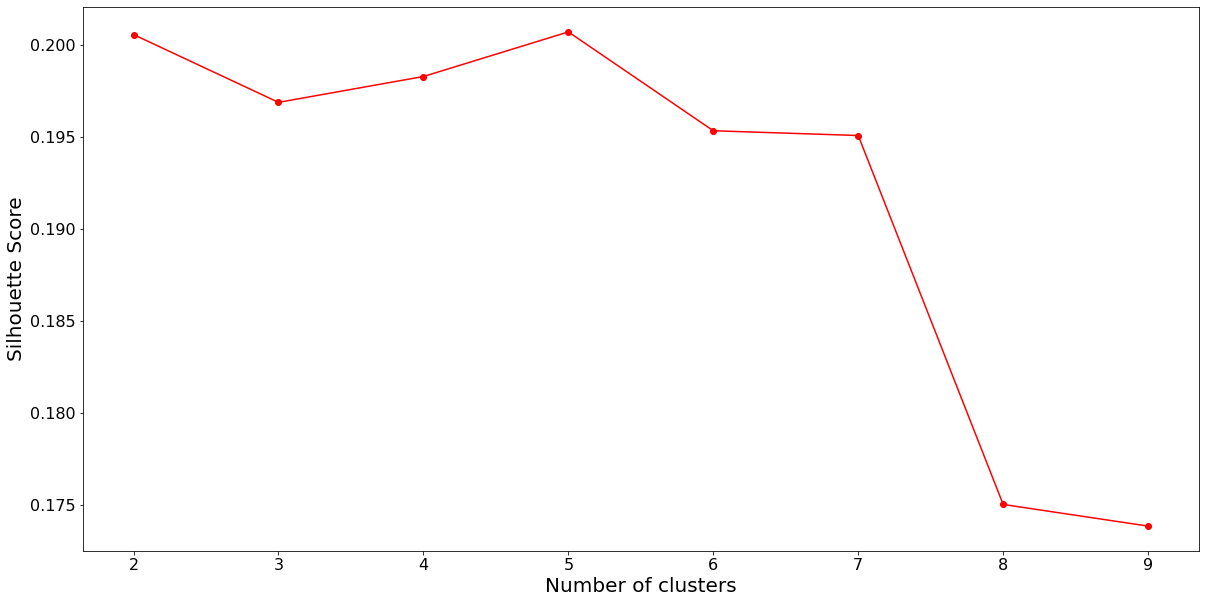

In [87]:
plot(max_range, scores, "Number of clusters", "Silhouette Score")

#### 14.2. Run k-means to cluster the neighborhood into 3 clusters

In [75]:
## set number of clusters
kclusters = 5

chicago_grouped_clustering = chicago_grouped_filtered.drop('District Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 0, 4, 4, 4, 0, 0, 0])

#### 14. 3. Let's create a new dataframe that includes the cluster as well as the top 10 venues for each districts

In [76]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chicago_merged = chicago_districts_locations

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(district_venues_sorted.set_index('District Name'), on='Name')

chicago_merged.head() # check the last columns!

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rogers Park,42.009574,-87.675550,0,Park,Beach,Pizza Place,Sandwich Place,Café,Fast Food Restaurant,African Restaurant,Mexican Restaurant,Coffee Shop,Supermarket
1,West Ridge,41.879788,-87.633113,2,Hotel,Theater,Steakhouse,Snack Place,Coffee Shop,New American Restaurant,Italian Restaurant,Gym,Park,Cuban Restaurant
2,Uptown,41.969450,-87.660513,0,Coffee Shop,Grocery Store,Vietnamese Restaurant,Mexican Restaurant,Breakfast Spot,Chinese Restaurant,Pizza Place,Sushi Restaurant,Vegetarian / Vegan Restaurant,Pet Store
3,Lincoln Square,40.148032,-89.363308,0,Pharmacy,Convenience Store,Pizza Place,Coffee Shop,Sandwich Place,Bar,Construction & Landscaping,Gym / Fitness Center,Discount Store,Donut Shop
4,"North Center, North Park",41.858657,-87.612199,0,Aquarium,History Museum,Park,Planetarium,Pizza Place,Historic Site,Grocery Store,Burger Joint,Beach,Coffee Shop


#### 14.4. Let's visualize the resulting clusters

In [77]:
# create map
map_clusters = folium.Map(location=[latitude_city, longitude_city], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Name'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    try:
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster-1)],
            fill=True,
            fill_color=rainbow[int(cluster-1)],
            fill_opacity=0.7).add_to(map_clusters)
    except:
        TypeError
       
map_clusters

### 15. Examine Clusters

#### 15.1. Now we can determine determine the discriminating venue categories that distinguish each cluster

#### Cluster 0

In [78]:
cluster_0 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]
# cluster_0.to_excel('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\COURSERA\\IBM_Data_Science\\Course_9\\cluster_0_5_1500m.xlsx')
cluster_0

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rogers Park,Park,Beach,Pizza Place,Sandwich Place,Café,Fast Food Restaurant,African Restaurant,Mexican Restaurant,Coffee Shop,Supermarket
2,Uptown,Coffee Shop,Grocery Store,Vietnamese Restaurant,Mexican Restaurant,Breakfast Spot,Chinese Restaurant,Pizza Place,Sushi Restaurant,Vegetarian / Vegan Restaurant,Pet Store
3,Lincoln Square,Pharmacy,Convenience Store,Pizza Place,Coffee Shop,Sandwich Place,Bar,Construction & Landscaping,Gym / Fitness Center,Discount Store,Donut Shop
4,"North Center, North Park",Aquarium,History Museum,Park,Planetarium,Pizza Place,Historic Site,Grocery Store,Burger Joint,Beach,Coffee Shop
6,Lincoln Park,Coffee Shop,Mexican Restaurant,Vegetarian / Vegan Restaurant,Spa,Sushi Restaurant,Bakery,Grocery Store,Gym,Gay Bar,Pub
8,Edison Park,Italian Restaurant,Salon / Barbershop,Sandwich Place,Breakfast Spot,Coffee Shop,Pizza Place,Bank,Mexican Restaurant,Bakery,American Restaurant
9,Norwood Park,Park,American Restaurant,Bar,Donut Shop,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Polish Restaurant,Sandwich Place,Pizza Place
10,Jefferson Park,Bar,Pizza Place,Park,Convenience Store,Bakery,Chinese Restaurant,Ice Cream Shop,Pharmacy,Coffee Shop,Grocery Store
11,Forest Glen,Grocery Store,Sandwich Place,Chinese Restaurant,Bar,Park,Pizza Place,Train Station,Filipino Restaurant,Pharmacy,Donut Shop
12,Albany Park,Pizza Place,Park,Middle Eastern Restaurant,Hookah Bar,Sandwich Place,Ice Cream Shop,Supermarket,Mobile Phone Shop,Donut Shop,Coffee Shop


#### Cluster 1

In [79]:
cluster_1 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]
# cluster_1.to_excel('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\COURSERA\\IBM_Data_Science\\Course_9\\cluster_1_5_1500m.xlsx')
cluster_1

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Hermosa,Mexican Restaurant,Sandwich Place,Grocery Store,Discount Store,Fast Food Restaurant,Pharmacy,Park,Fried Chicken Joint,Donut Shop,Cuban Restaurant
26,North Lawndale,Mexican Restaurant,Pharmacy,Bank,Pizza Place,Seafood Restaurant,Food,Mobile Phone Shop,Liquor Store,Fast Food Restaurant,Nightclub
27,South Lawndale,Mexican Restaurant,Pharmacy,Bank,Pizza Place,Seafood Restaurant,Food,Mobile Phone Shop,Liquor Store,Fast Food Restaurant,Nightclub
33,Grand Boulevard,Sandwich Place,Discount Store,Park,Pharmacy,Sporting Goods Shop,Mexican Restaurant,Donut Shop,Gas Station,American Restaurant,Seafood Restaurant
43,Calumet Heights,Mexican Restaurant,Park,Fast Food Restaurant,Discount Store,Bank,Pharmacy,Sandwich Place,Shoe Store,Grocery Store,Currency Exchange
47,East Side,Harbor / Marina,Mexican Restaurant,Bar,Pizza Place,Park,Supermarket,Fast Food Restaurant,Seafood Restaurant,Shipping Store,Light Rail Station
52,Archer Heights,Mexican Restaurant,Pizza Place,Discount Store,Sandwich Place,Bank,Fast Food Restaurant,Video Store,Bar,Grocery Store,Bakery
53,Brighton Park,Mexican Restaurant,Fast Food Restaurant,Park,Sandwich Place,Donut Shop,Taco Place,Hot Dog Joint,Video Store,Ice Cream Shop,Supermarket
54,McKinley Park,Fast Food Restaurant,Mexican Restaurant,Park,Sandwich Place,Video Store,Donut Shop,Grocery Store,Taco Place,Pizza Place,Ice Cream Shop
55,Bridgeport,Mexican Restaurant,Grocery Store,Art Gallery,Diner,Soccer Field,Bakery,Fast Food Restaurant,Coffee Shop,Pet Store,Furniture / Home Store


#### Cluster 2

In [80]:
cluster_2 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]
# cluster_2.to_excel('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\COURSERA\\IBM_Data_Science\\Course_9\\cluster_2_5_1500m.xlsx')
cluster_2

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,West Ridge,Hotel,Theater,Steakhouse,Snack Place,Coffee Shop,New American Restaurant,Italian Restaurant,Gym,Park,Cuban Restaurant
5,Lake View,Hotel,Steakhouse,Bar,Theater,Mediterranean Restaurant,New American Restaurant,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Park
7,Near North Side,Steakhouse,Hotel,Italian Restaurant,Pizza Place,Bar,New American Restaurant,Gym / Fitness Center,Mexican Restaurant,Gym,Coffee Shop
25,"Near West Side, Near South Side, Lower West Side",Steakhouse,Hotel,Italian Restaurant,Pizza Place,Bar,New American Restaurant,Gym / Fitness Center,Mexican Restaurant,Gym,Coffee Shop
28,Loop,Hotel,Steakhouse,Theater,Park,Snack Place,Bar,Italian Restaurant,Coffee Shop,Donut Shop,Museum
69,Morgan Park,Italian Restaurant,New American Restaurant,Pizza Place,Coffee Shop,Restaurant,Hotel,Burger Joint,Grocery Store,Café,Yoga Studio


#### Cluster 3

In [81]:
cluster_3 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 3, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]
# cluster_3.to_excel('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\COURSERA\\IBM_Data_Science\\Course_9\\cluster_3_5_1500m.xlsx')
cluster_3

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,South Deering,Canal Lock,Harbor / Marina,Greek Restaurant,Nature Preserve,River,Dry Cleaner,Duty-free Shop,Eastern European Restaurant,Electronics Store,Elementary School


#### Cluster 4

In [82]:
cluster_4 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 4, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]
# cluster_4.to_excel('C:\\Users\\Fintor Krisztián\\Documents\\MEGA\COURSERA\\IBM_Data_Science\\Course_9\\cluster_4_5_1500m.xlsx')
cluster_4

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Dunning,Fast Food Restaurant,Clothing Store,Pizza Place,Ice Cream Shop,Deli / Bodega,Hot Dog Joint,Sandwich Place,Italian Restaurant,Bakery,Sports Bar
16,Montclare,Fast Food Restaurant,Grocery Store,Pizza Place,Bakery,Donut Shop,Discount Store,Italian Restaurant,Park,Mexican Restaurant,Ice Cream Shop
22,"West Town, West Englewood",Fast Food Restaurant,Gas Station,Seafood Restaurant,Park,Intersection,Light Rail Station,Fried Chicken Joint,Supermarket,Mexican Restaurant,Bookstore
23,Austin,Golf Course,Fast Food Restaurant,Gym,Grocery Store,Southern / Soul Food Restaurant,Seafood Restaurant,Convenience Store,Cosmetics Shop,Hobby Shop,Sandwich Place
24,"West Garfield Park, East Garfiled Park",Train Station,Fast Food Restaurant,Park,Food,Café,Botanical Garden,Discount Store,Fried Chicken Joint,Sandwich Place,Pet Service
31,Oakland,Bar,Pharmacy,Fast Food Restaurant,Bank,Sandwich Place,Cosmetics Shop,Pizza Place,Diner,Discount Store,Convenience Store
37,Woodlawn,Fried Chicken Joint,Lounge,Fast Food Restaurant,Sandwich Place,Discount Store,Bank,Grocery Store,Chinese Restaurant,Supermarket,Pizza Place
39,Chatham,Lounge,Sandwich Place,Fried Chicken Joint,Fast Food Restaurant,Bar,Donut Shop,BBQ Joint,Discount Store,Chinese Restaurant,American Restaurant
40,Avalon Park,Fast Food Restaurant,Sandwich Place,Discount Store,Pharmacy,Chinese Restaurant,Lounge,Video Store,Pizza Place,Diner,Donut Shop
42,Burnside,Fast Food Restaurant,Fried Chicken Joint,Rental Car Location,Shoe Store,Liquor Store,Athletics & Sports,Optical Shop,Gas Station,Discount Store,Nightclub
